In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


GAN
```
진짜와 가짜를 구별수 없을정도로 정교한 가짜를 만드는 생성자를 학습하는 알고리즘
생성자
  가짜 데이터를 만들어냄
  노이즈 데이터(랜덤데이터)를 받아서 진짜같은 이미지나 음성 텍스트등을 생성
판별자(감별자)
  생성자가 만든 가짜와 실제데이터를 비교해서 판단
```
```
데이터
  실제데이터
  생성자에 입력할 무작위 노이즈 데이터
가짜 데이터 생성
  생성자는 노이즈 벡터를 받아서 가짜 데이터 생성
판별자 학습
  가짜데이터, 진짜데이터를 모두 입력받아서 각 데이터가 진짜일 확률을 출력    
  보통은 이진분류로 접근 실제데이터는 1, 가짜데이터는 0을 정답레이블로 생성
  손실함수 : 이진크로스엔트로피
생성자 학습
  판별자의 파라메터를 고정한 상태에서 생성자는 업데이트 된다
  판별자가 생성자가 생성한 데이터를 1이라고 잘못 분류하도록 생성자의 파라미터를 조정
  손실함수 : 이진 크로스 엔트로피  
```

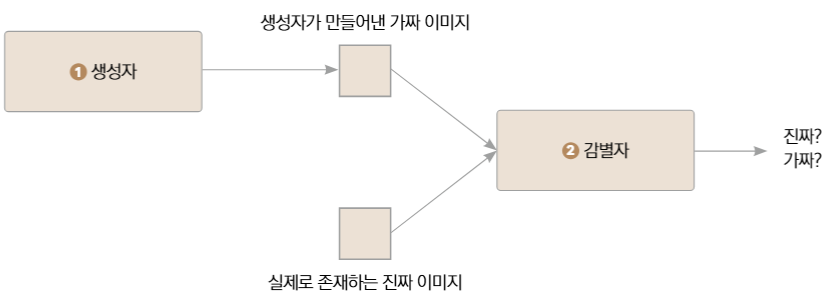

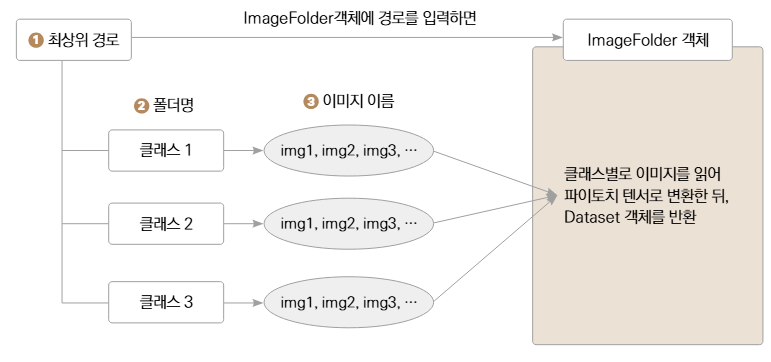

In [2]:
!unzip /content/drive/MyDrive/data/img_align_celeba.zip -d GAN

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 extracting: GAN/img_align_celeba/197600.jpg  
 extracting: GAN/img_align_celeba/197601.jpg  
 extracting: GAN/img_align_celeba/197602.jpg  
 extracting: GAN/img_align_celeba/197603.jpg  
 extracting: GAN/img_align_celeba/197604.jpg  
 extracting: GAN/img_align_celeba/197605.jpg  
 extracting: GAN/img_align_celeba/197606.jpg  
 extracting: GAN/img_align_celeba/197607.jpg  
 extracting: GAN/img_align_celeba/197608.jpg  
 extracting: GAN/img_align_celeba/197609.jpg  
 extracting: GAN/img_align_celeba/197610.jpg  
 extracting: GAN/img_align_celeba/197611.jpg  
 extracting: GAN/img_align_celeba/197612.jpg  
 extracting: GAN/img_align_celeba/197613.jpg  
 extracting: GAN/img_align_celeba/197614.jpg  
 extracting: GAN/img_align_celeba/197615.jpg  
 extracting: GAN/img_align_celeba/197616.jpg  
 extracting: GAN/img_align_celeba/197617.jpg  
 extracting: GAN/img_align_celeba/197618.jpg  
 extracting: GAN/img_align_celeba/197619.jpg  
 extracting: GAN/img_ali

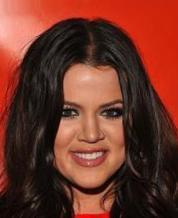

In [3]:
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image
file_lists = glob('/content/GAN/img_align_celeba/*.jpg')
Image.open(file_lists[1100])

ImageForder 객체를 통해 데이터셋

In [ ]:
import torch
import torchvision.transforms as tf
from torchvision.datasets import ImageFolder
from torch.utils.data.dataloader import DataLoader
# 이미지 전처리
transforms = tf.Compose([
    tf.Resize((64,64)),
    tf.CenterCrop(64), # 원본이미지에서 가운데를 도려내고 다시 원본과 같은 크기로 복원
    tf.ToTensor(),
    tf.Normalize(mean=(0.5,0.5,0.5), std=(0.25,0.25,0.25))
])
dataset = ImageFolder(root='./GAN',transform=transforms)
loader = DataLoader(dataset, batch_size=128,shuffle=True)
data, _ = next(iter(loader))
data.shape

torch.Size([128, 3, 64, 64])

생성자
```
업샘플링층
배치정규화층
입력은 100차원의 벡터로
```
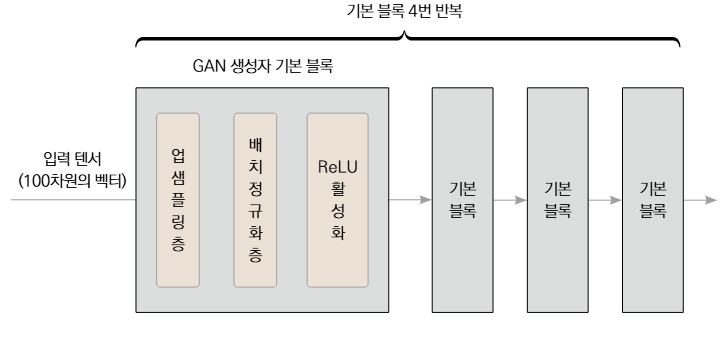

In [ ]:
import torch
import torch.nn as nn
class Generator(nn.Module):
  def __init__(self):
    super().__init__()
    self.gen = nn.Sequential(
        # 입력벡터는(B,100,1,1)
        nn.ConvTranspose2d(100,512,kernel_size=4,bias=False),  # 4 x 4
        nn.BatchNorm2d(512),
        nn.ReLU(),

        # stride = 2, padding =1  해상도를 2배로 키우는데 사용
        nn.ConvTranspose2d(512,256, kernel_size=4, stride=2,padding=1, bias=False),  # 8x8
        nn.BatchNorm2d(256),
        nn.ReLU(),

        nn.ConvTranspose2d(256,128, kernel_size=4, stride=2,padding=1, bias=False),  # 16x16
        nn.BatchNorm2d(128),
        nn.ReLU(),

        nn.ConvTranspose2d(128,64, kernel_size=4, stride=2,padding=1, bias=False),  # 32x32
        nn.BatchNorm2d(64),
        nn.ReLU(),

        nn.ConvTranspose2d(64,3, kernel_size=4, stride=2,padding=1, bias=False),  # 64x64
        nn.Tanh()  # 출력값을 -1 ~ 1 정규화 (입력데이터가 정규화를 통해 -1 ~ 1사이에서 학습)
    )
  def forward(self,x ):
    return self.gen(x)

In [ ]:
Generator()

Generator(
  (gen): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)

In [ ]:
z = torch.randn(1,100,1,1)
layer_1 =Generator().gen[0]
layer_1(z).shape

torch.Size([1, 512, 4, 4])

In [ ]:
g = Generator()
g.gen[3](g.gen[0](z)).shape

torch.Size([1, 256, 8, 8])

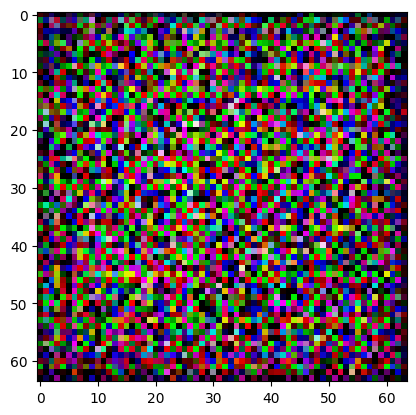

In [ ]:
import matplotlib.pyplot as plt
g = Generator()
# (B,100,1,1) 테스트 데이터 생성
z = torch.randn(1,100,1,1)
temp_img = g(z)
plt.imshow(temp_img[0].permute(1,2,0).detach().numpy() )

GAN 감별자 정의
```
기존의 CNN 과 유사하게 구성이 된다
합성곱하고 배치정규화를 쌓는다
```

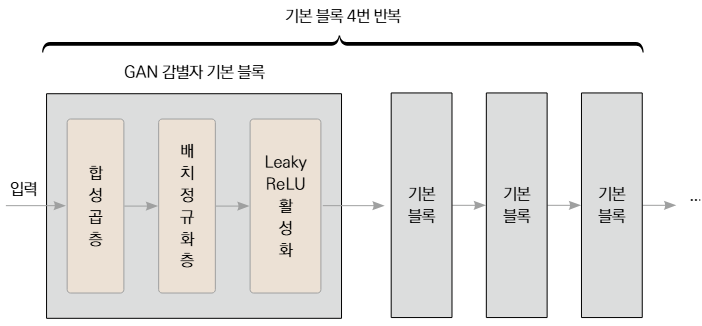

In [ ]:
class Discriminator(nn.Module):
  def __init__(self):
    super().__init__()
    self.disc = nn.Sequential(
        # 입력모양 (B, 3, 64, 64)
        nn.Conv2d(3,64,kernel_size=4,stride=2,padding=1,bias=False), # 해상도 절반으로 32,32
        nn.BatchNorm2d(64),
        nn.LeakyReLU(0.2),  # Relu는 0이하에서는 기울기가 0이지만 leakylelu 0이하에서는 0.2를 유지 죽은뉴런을 방지

        nn.Conv2d(64,128,kernel_size=4,stride=2,padding=1,bias=False), # 해상도 절반으로 16,16
        nn.BatchNorm2d(128),
        nn.LeakyReLU(0.2),

        nn.Conv2d(128,256,kernel_size=4,stride=2,padding=1,bias=False), # 해상도 절반으로 8,8
        nn.BatchNorm2d(256),
        nn.LeakyReLU(0.2),

        nn.Conv2d(256,512,kernel_size=4,stride=2,padding=1,bias=False), # 해상도 절반으로 4,4
        nn.BatchNorm2d(512),
        nn.LeakyReLU(0.2),

        nn.Conv2d(512,1,kernel_size=4),  # 1,1  마지막 분류층
        # nn.Sigmoid()  # 0 ~ 1  (1진짜, 0가짜)  손실함수로 BCEWithLogitsLoss 을 사용하기 때문에 사용안함
    )
  def forward(self,x):
    return self.disc(x)

In [ ]:
z = torch.randn(1,100,1,1)
g = Generator()  # 0 3 6 9 12
g_output = g(z)
d = Discriminator()
d_output = d(g_output)
d_output

tensor([[[[-0.1515]]]], grad_fn=<ConvolutionBackward0>)

가중치 초기화
```
GAN  
  합성곱(평균0.0 표준편차0.02), --> DCGAN  2015 논문에서 제안된 값
  배치정규화(1.0, 0.02)는 가중치 초기화   1.0은 출력분포가 원래대로 유지
  배치 정규화층의 편향은 0으로 설정  -> 미세조정 및 출력평균을 조절, 보통 0으로 시작하는게 일반적인 상황
  평균이 0 이고 표준편차가 0.02 --> 학습이 가장 잘 되는 case --> 경험적으로 발견한 값

```

In [ ]:
# 가중치 초기화 함수
def weights_init(m):
  # 층의 종류 추출
  classname = m.__class__.__name__
  if classname.find('Conv') != -1:  # 합성곱층
    # 합성곱 층 초기화
    nn.init.normal_(m.weight.data, mean = 0.0, std = 0.02)
  elif classname.find('Batch') != -1:  # 배치정규화:
    nn.init.normal_(m.weight.data, mean=1.0, std = 0.02)
    nn.init.constant_(m.bias.data, 0)  # 정규화한후 이동량이 없다(필요없음)  출력의 평균이 유지되서 안정적인 학습가능

In [ ]:
g = Generator()
g.gen[0].__class__.__name__

'ConvTranspose2d'

모델 학습
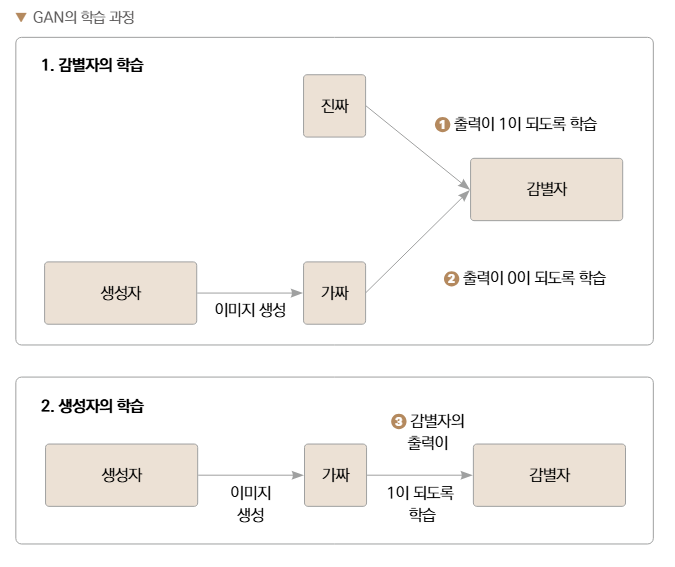

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
# 생정자 정의
G = Generator().to(device)
# 가중치 초기화
G.apply(weights_init)
# 감별자 정의
D = Discriminator().to(device)
# 감별자 가중치 초기화
D.apply(weights_init)

G_optim = torch.optim.Adam(G.parameters(),lr=1e-4)
D_optim = torch.optim.Adam(D.parameters(),lr=1e-4)

Dloss_fn = nn.BCEWithLogitsLoss()  # sigmoid 포함
Gloss_fn = nn.BCEWithLogitsLoss()

from tqdm import tqdm
for epoch in range(50):
  iterator = tqdm(loader)
  for data in iterator:
    D_optim.zero_grad()
    # 정답텐서 설정
    label = torch.ones_like(data[1], dtype = torch.float32).to(device)
    label_fake = torch.zeros_like(data[1], dtype = torch.float32).to(device)
    # 실제 이미지 학습
    real = D(data[0].to(device))
    Dloss_real = Dloss_fn(torch.squeeze(real), label)  # 배치차원을 없애줘야함
    Dloss_real.backward()
    # 가짜 이미지 생성 및 학습
    noise = torch.randn(label.shape[0],100,1,1,device=device)  #랜덤 노이즈로부터 가짜이미지 생성
    fake = G(noise)

    output = D(fake.detach())  # detach: 생성자에 영향을 주지 않도록 연산그래프를 끊어버림

    Dloss_fake = Dloss_fn(torch.squeeze(output), label_fake)
    Dloss_fake.backward()
    # 진짜와 가짜에 대한 전체 오차를 합산해서 한번에 업데이트
    Dloss = Dloss_real + Dloss_fake
    D_optim.step()
    ################# 감별자 학습끝 ############
    #생성자 학습
    G_optim.zero_grad()
    #생성자의 기울기를 0 초기화
    output = D(fake)
    Gloss = Gloss_fn(torch.squeeze(output), label)  # 감별자가 가짜를 진짜로 믿도록 유도  정답을 1로설정
    # 감별자를 속이는 방향으로 학습
    Gloss.backward()
    G_optim.step()  # 생성자 업데이트
    iterator.set_description(f"epoch : {epoch+1}")
    iterator.set_postfix (d_loss=Dloss.item(), g_loss = Gloss.item() )
# 필요시 세이브

epoch : 1:   1%|          | 10/1583 [00:04<13:04,  2.01it/s, d_loss=0.326, g_loss=4.33]


KeyboardInterrupt: 

모델 로드

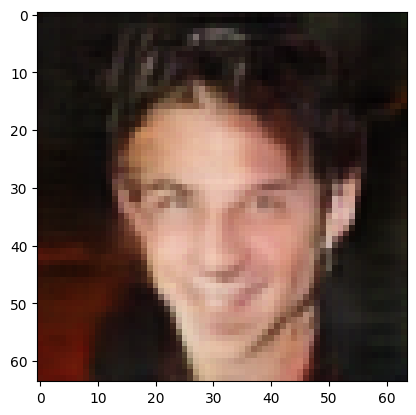

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
import matplotlib.pyplot as plt

loaded_generated = Generator()
loaded_generated.load_state_dict(
    torch.load('/content/drive/MyDrive/SKN_data/Generator.pth'
      ,map_location=device,weights_only=False)
)
loaded_generated = loaded_generated.to(device)
loaded_generated.eval()
with torch.no_grad():
  feature_vector = torch.randn(1,100,1,1).to(device)
  pred = loaded_generated(feature_vector).squeeze()
  pred = pred.permute(1,2,0).cpu().numpy()  #  matplotlib cup 만 지원
  pred = (pred+1)/2
  plt.imshow(pred)
  plt.show()


강화학습
```
에이전트(agent)가 환경(Environment)과 상화작용하며 보상(Reward)을 최대화 하는 정책(Policy)을 학습
환경 : 학습이 이루어지는 공간(게임, 시뮬레이션)
에이전트 : 환경에서 행동을 선택하는 주체
행동 : 에이전트가 환경에 맞게 취할수 있는 행동(왼쪽/오른쪽)
보상 : 행동에따라서 환경이 제공하는 평가값(목표달성시 양의값)
```

In [ ]:
!pip install torch torchvision gym

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

환경
```
OpenAI Gym CartPole 환경
막대가 넘어지지 않도록 균형을 유지
```

In [ ]:
import gym
env = gym.make('CartPole-v1')
state = env.reset()
state

/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


array([ 0.00325208, -0.03355562, -0.00595808, -0.01457423], dtype=float32)

In [ ]:
import gym
env = gym.make('CartPole-v1',new_step_api=True)  # 최신버전에 맞춰 반환값 형식을 사용
state = env.reset() # 초기 상태 설정
# 수레의 위치, 수레의 속도, 막대의 기울기, 막대기울기의 속
state

array([-0.03847449,  0.01386381,  0.00289663,  0.04160529], dtype=float32)

In [ ]:
import numpy as np
action = env.action_space.sample() # 무작위 행동 0또는 1
# 선택된 행동, 다음상태, 보상, 종료여부,강제종료여부
env.step(action)

(array([-0.04182321,  0.01376913,  0.01043275,  0.04369597], dtype=float32),
 1.0,
 False,
 False,
 {})

신경망(Policy Network)정의
```
에이전트가 행동을 선택하기 위해 사용하는 간단한 신경망을 정의
에이전트가 주어진 환경에서 어떤 행동을 할지 확률적으로 결정하는 신경망
```

In [ ]:
class PolicyNetwork(nn.Module):
  def __init__(self,input_dim,output_dim):  # input_dim catPol 은 4개 output_dim:가능한 행동의수 2(왼쪽오른쪽)
    super().__init__()
    self.fc = nn.Sequential(
        nn.Linear(input_dim, 128),
        nn.ReLU(),
        nn.Linear(128, output_dim),
        nn.Softmax(dim=-1) # 마지막 차원을 기준으로 해서 softmax적용(행동 선택용 확률)
    )
  def forward(self,x):
    return self.fc(x)
state_dim = env.observation_space.shape[0]  # 상태 차원
action_dim = env.action_space.n  # 행동 차원
# state_dim
# 수레의 위치, 수레의 속도, 막대의 기울기, 막대기울기의 속도
# x, x_dot, theta,th
print(state_dim, action_dim )


4 2


정책 네트워크 및 옵티마이져  설정

In [ ]:
policy_net = PolicyNetwork(state_dim,action_dim)
optimizer = optim.Adam(policy_net.parameters(), lr= 0.01)

에이전트 행동 학습
```
에이전트가 환경에서 행동을 선택하고, 보상받고, 보상에 따라 정책을 학습하는 구조

reinforce 수식
보상이 높으면 그행동을 강화하고 낮으면 억제
```
$$\mathcal{L}(\theta) = - \sum_{t=0}^{T} \log \pi_{\theta}(a_t \mid s_t) \cdot R_t$$

$$\mathcal{L}(\theta) 손실함수 $$

$$\log \pi_{\theta}(a_t \mid s_t) : 정책 네트워크가 s_t 상태에서 a_t 행동을 선택할 확률(파라메터 \theta에의해서 결정)$$

$$R_t: t시간 이후 얻을 누적 보상$$
T : 에피소드 종료

In [ ]:
import torch
def select_action(state):
  state = torch.tensor(state, dtype = torch.float32)
  action_probs = policy_net(state)
  action = torch.distributions.Categorical(action_probs).sample() # 확률에 따라서 0또는 1을 선택
  return action.item()
rewards_lists = []
total_reward = 0
# 학습루프  episode : 폴대가 넘어질때까지
for episode in range(500):
  # 상태 초기화
  state = env.reset()

  rewards = []
  log_probs = [] # 정책확률을 저장 --> gradient 계산에 필요
  while True:
    # 에이전트가 행동 선택
    action = select_action(state)
    # 환경과 상호작용: 행동을 선택하고 step을 통해 다음상태,보상등을 받음
    next_step, reward, done,truncation,info = env.step(action)  # done이 Ture이면 에피소드 종료
    # 보상과 행동의 확률을 저장
    rewards.append(reward)
    log_prob = torch.log(policy_net(torch.tensor(state, dtype=torch.float32))[action])
    log_probs.append(log_prob)
    total_reward += reward
    state = next_step
    if done:
      break
  # 손실 계산 정책 업데이트  reinforce
  rewards_lists.append(sum(rewards))
  loss = -sum([ log_prob*reward for log_prob,reward in zip(log_probs,rewards)  ])
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  print(f'episode {episode+1} total reward = {total_reward}')

episode 1 total reward = 9.0
episode 2 total reward = 19.0
episode 3 total reward = 29.0
episode 4 total reward = 38.0
episode 5 total reward = 47.0
episode 6 total reward = 58.0
episode 7 total reward = 66.0
episode 8 total reward = 74.0
episode 9 total reward = 84.0
episode 10 total reward = 94.0
episode 11 total reward = 104.0
episode 12 total reward = 114.0
episode 13 total reward = 122.0
episode 14 total reward = 132.0
episode 15 total reward = 141.0
episode 16 total reward = 151.0
episode 17 total reward = 160.0
episode 18 total reward = 169.0
episode 19 total reward = 178.0
episode 20 total reward = 187.0
episode 21 total reward = 197.0
episode 22 total reward = 207.0
episode 23 total reward = 216.0
episode 24 total reward = 225.0
episode 25 total reward = 235.0
episode 26 total reward = 245.0
episode 27 total reward = 255.0
episode 28 total reward = 265.0
episode 29 total reward = 273.0
episode 30 total reward = 282.0
episode 31 total reward = 292.0
episode 32 total reward = 30

에이전트의 행동을 시각적으로 표현(colab에서는 안됨)

In [ ]:
import gym
from gym.wrappers import RecordVideo
env = RecordVideo(gym.make('CartPole-v1'), 'video/')
state = env.reset()
for episode in range(100):
  env.render()
  action = select_action(state)
  next_step, reward, terminated,truncated,info = env.step(action)
  done = terminated or truncated
  state = next_step
  if done:
    break
env.close()

/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/record_video.py:78: UserWarning: WARN: Overwriting existing videos at /content/video folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environ

AttributeError: module 'numpy' has no attribute 'bool8'

보스턴 주택 가격을 강화학습으로
```
  상태 : 주택의 특성(방개수, 범죄율, 인구밀도)
  행동 : 가격조정(상승/하락)
  보상 : 실제가격과 예측가역의 차이
```

환경 클레스

In [4]:
import pandas as pd
import numpy as np
import gym
import numpy as np
from sklearn.preprocessing import StandardScaler

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [5]:
import gymnasium as gym
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
import random

class BostonHousingEnv(gym.Env):
    def __init__(self):
        super(BostonHousingEnv, self).__init__()

        # 캘리포니아 주택 데이터셋 로드
        california = fetch_california_housing()
        self.data = california.data
        self.target = california.target

        # 특성 스케일링
        self.scaler = StandardScaler()
        self.data = self.scaler.fit_transform(self.data)

        # 타겟 스케일링
        self.target_scaler = StandardScaler()
        self.target = self.target_scaler.fit_transform(self.target.reshape(-1, 1)).flatten()

        # 환경 파라미터 설정
        self.state_size = self.data.shape[1]  # 특성의 수
        self.current_idx = 0

        # 관측 공간 정의 (각 특성의 범위는 스케일링된 값의 범위로 설정)
        self.observation_space = gym.spaces.Box(
            low=np.min(self.data, axis=0).astype(np.float32),
            high=np.max(self.data, axis=0).astype(np.float32),
            dtype=np.float32
        )

        # 행동 공간 정의 (가격 조정값)
        self.action_space = gym.spaces.Box(
            low=np.array([-1.0], dtype=np.float32),
            high=np.array([1.0], dtype=np.float32),
            shape=(1,),
            dtype=np.float32
        )

    def reset(self, seed=None, options=None):
        # 랜덤한 데이터 포인트 선택
        self.current_idx = random.randint(0, len(self.data) - 1)
        return self.data[self.current_idx].astype(np.float32), {}

    def step(self, action):
        # 현재 상태에서의 실제 가격
        actual_price = self.target[self.current_idx]

        # 행동을 가격 조정값으로 변환
        price_adjustment = action[0]

        # 예측 가격 계산
        predicted_price = actual_price + price_adjustment

        # 보상 계산 (예측 오차의 음수값)
        error = abs(predicted_price - actual_price)
        reward = -error

        # 다음 상태로 이동
        self.current_idx = (self.current_idx + 1) % len(self.data)
        next_state = self.data[self.current_idx].astype(np.float32)

        # 에피소드 종료 조건
        done = self.current_idx == 0

        # 정보
        info = {
            'actual_price': actual_price,
            'predicted_price': predicted_price,
            'error': error
        }

        return next_state, reward, done, False, info

    def render(self):
        # 현재 상태 출력
        print(f"Current State: {self.data[self.current_idx]}")
        print(f"Actual Price: {self.target[self.current_idx]:.2f}")

    def inverse_transform_price(self, price):
        # 스케일링된 가격을 원래 스케일로 변환
        return self.target_scaler.inverse_transform([[price]])[0][0]

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from collections import deque
import random

# DQN 신경망 클래스 정의
class DQN(nn.Module):
    def __init__(self, input_size, output_size):
        super(DQN, self).__init__()
        # 3개의 완전 연결 레이어로 구성된 신경망
        # 입력층: 환경의 상태(13개 특성)를 받아들임
        # 은닉층: 128개의 뉴런으로 구성된 2개의 레이어
        # 출력층: 연속적인 행동값(가격 조정)을 출력
        self.fc1 = nn.Linear(input_size, 128)    # 입력층 -> 은닉층1
        self.fc2 = nn.Linear(128, 128)           # 은닉층1 -> 은닉층2
        self.fc3 = nn.Linear(128, output_size)   # 은닉층2 -> 출력층
        self.relu = nn.ReLU()
    def forward(self, x):
        # 순전파 과정: ReLU 활성화 함수 사용
        # ReLU는 음수값을 0으로 만들고 양수값은 그대로 유지
        # 이는 신경망의 표현력을 높이고 기울기 소실 문제를 완화
        x = self.relu(self.fc1(x))  # 첫 번째 은닉층 통과
        x = self.relu(self.fc2(x))  # 두 번째 은닉층 통과
        return self.fc3(x)           # 출력층 통과 (Q-value 반환)

# 경험 재생 버퍼 클래스  : 메모리 구조
class ReplayBuffer:
    def __init__(self, capacity):
        # 최대 크기가 capacity인 deque로 버퍼 초기화
        # deque는 양쪽 끝에서 빠른 삽입/삭제가 가능한 자료구조
        self.buffer = deque(maxlen=capacity)

    def push(self, state, action, reward, next_state, done):
        # 새로운 경험을 버퍼에 저장
        # (상태, 행동, 보상, 다음 상태, 종료 여부) 튜플로 저장
        self.buffer.append((state, action, reward, next_state, done))

    def sample(self, batch_size):
        # 버퍼에서 무작위로 batch_size개의 경험을 샘플링
        # 무작위 샘플링은 경험 간의 상관관계를 깨뜨려 학습 안정성 향상
        return random.sample(self.buffer, batch_size)

    def __len__(self):
        # 현재 버퍼에 저장된 경험의 수 반환
        return len(self.buffer)

# DQN 에이전트 클래스
class DQNAgent:
    def __init__(self, state_size, action_size):
        # 환경의 상태와 행동 공간 크기 저장
        self.state_size = state_size
        self.action_size = action_size

        # 경험 재생 버퍼 초기화 (최대 10000개의 경험 저장)
        # 충분한 크기의 버퍼는 다양한 경험을 저장하고 학습의 안정성 향상
        self.memory = ReplayBuffer(10000)

        # 강화학습 하이퍼파라미터 설정
        self.gamma = 0.99    # 미래 보상의 할인율 (즉각적인 보상 vs 미래 보상의 균형)
        self.epsilon = 1.0   # 탐험률 (초기값 1.0: 완전한 무작위 탐험)
        self.epsilon_min = 0.01  # 최소 탐험률 (학습이 진행되어도 일정 수준의 탐험 유지)
        self.epsilon_decay = 0.995  # 탐험률 감소율 (학습이 진행될수록 탐험을 줄임)
        self.learning_rate = 0.001  # 학습률 (가중치 업데이트의 크기)
        self.batch_size = 64  # 배치 크기 (한 번에 학습하는 경험의 수)

        # 정책 네트워크와 타겟 네트워크 초기화
        # 정책 네트워크: 현재 정책을 학습
        # 타겟 네트워크: 정책 네트워크의 가중치를 주기적으로 복사하여 학습의 안정성 향상
        self.policy_net = DQN(state_size, action_size)
        self.target_net = DQN(state_size, action_size)
        self.target_net.load_state_dict(self.policy_net.state_dict())

        # Adam 옵티마이저 초기화
        # Adam은 적응적 학습률을 사용하여 학습 속도와 안정성을 개선
        self.optimizer = optim.Adam(self.policy_net.parameters(), lr=self.learning_rate)

    def select_action(self, state):
        # ε-greedy 정책으로 행동 선택
        if random.random() < self.epsilon:
            # 탐험: 무작위 행동 선택 (-1에서 1 사이의 값)
            # 초기에는 무작위 탐험을 통해 다양한 경험 축적
            return np.random.uniform(-1, 1, size=(self.action_size,))

        # 활용: 현재 정책에 따라 최적의 행동 선택
        # 학습이 진행될수록 신경망의 예측을 더 신뢰
        with torch.no_grad():
            state = torch.FloatTensor(state).unsqueeze(0)
            q_values = self.policy_net(state)
            return q_values.numpy()[0]  # [0]을 추가하여 1차원 배열로 변환

    def train(self):
        # 배치 크기보다 작으면 학습하지 않음
        # 충분한 경험이 쌓일 때까지 기다림
        if len(self.memory) < self.batch_size:
            return

        # 경험 재생 버퍼에서 배치 샘플링
        batch = self.memory.sample(self.batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)

        # 텐서 변환 수정
        states = torch.FloatTensor(np.vstack(states))
        actions = torch.FloatTensor(np.vstack(actions))
        rewards = torch.FloatTensor(np.array(rewards))
        next_states = torch.FloatTensor(np.vstack(next_states))
        dones = torch.FloatTensor(np.array(dones))

        # 현재 Q-value 계산
        current_q_values = self.policy_net(states)

        # 다음 상태의 최대 Q-value 계산
        # 타겟 네트워크를 사용하여 학습의 안정성 향상
        next_q_values = self.target_net(next_states).max(1)[0].detach()

        # 타겟 Q-value 계산 (Bellman 방정식)
        # 현재 보상 + 미래 보상의 할인값
        target_q_values = rewards + (1 - dones) * self.gamma * next_q_values

        # MSE 손실 계산
        # 현재 Q-value와 타겟 Q-value의 차이를 최소화
        loss = nn.MSELoss()(current_q_values.squeeze(), target_q_values)

        # 역전파 및 가중치 업데이트
        self.optimizer.zero_grad()  # 기울기 초기화
        loss.backward()            # 역전파
        self.optimizer.step()      # 가중치 업데이트

        # 탐험률 감소
        # 학습이 진행될수록 무작위 탐험을 줄이고 학습된 정책을 더 신뢰
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

    def update_target_network(self):
        # 타겟 네트워크를 정책 네트워크의 가중치로 업데이트
        # 주기적인 업데이트로 학습의 안정성 향상
        self.target_net.load_state_dict(self.policy_net.state_dict())

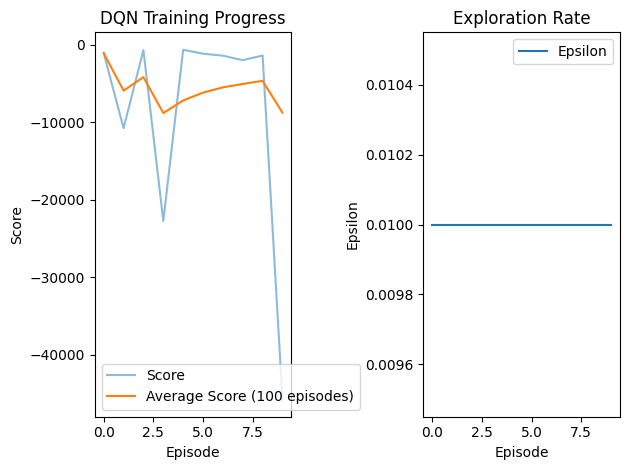

Episode: 9
Score: -45738.38
Average Score (last 100): -8783.12
Best Average Score: -1100.68
Epsilon: 0.01
--------------------------------------------------

=== Inference Results ===

Sample 1:
Actual Price: $4.50
Predicted Price: $4.31
Error: $0.19

Sample 2:
Actual Price: $0.77
Predicted Price: $-5.76
Error: $6.53

Sample 3:
Actual Price: $2.24
Predicted Price: $-1.59
Error: $3.83

Sample 4:
Actual Price: $2.50
Predicted Price: $-0.91
Error: $3.41

Sample 5:
Actual Price: $2.08
Predicted Price: $-4.80
Error: $6.89

Sample 6:
Actual Price: $3.26
Predicted Price: $3.18
Error: $0.08

Sample 7:
Actual Price: $1.05
Predicted Price: $0.92
Error: $0.13

Sample 8:
Actual Price: $1.15
Predicted Price: $1.00
Error: $0.15

Sample 9:
Actual Price: $4.00
Predicted Price: $3.86
Error: $0.14

Sample 10:
Actual Price: $1.96
Predicted Price: $1.86
Error: $0.10

Average Error: $2.15


In [8]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import torch
import os

def train_agent(save_path='boston_dqn_model.pth'):
    # 환경 생성
    # BostonHousingEnv는 보스턴 주택 데이터를 강화학습 환경으로 변환
    env = BostonHousingEnv()

    # 에이전트 초기화
    # state_size: 13 (주택 특성의 수)
    # action_size: 1 (가격 조정값)
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.shape[0]
    agent = DQNAgent(state_size, action_size)

    # 학습 파라미터 설정
    episodes = 10          # 총 학습 에피소드 수
    target_update = 10      # 타겟 네트워크 업데이트 주기
    scores = []             # 각 에피소드의 점수를 저장하는 리스트
    avg_scores = []         # 이동 평균 점수를 저장하는 리스트
    best_avg_score = float('-inf')

    # 실시간 시각화를 위한 figure 초기화
    # 15x5 크기의 그래프로 학습 진행 상황을 시각화
    plt.figure(figsize=(15, 5))

    # 에피소드별 학습 루프
    for episode in range(episodes):
        # 환경 초기화
        state, _ = env.reset()
        score = 0           # 현재 에피소드의 점수
        done = False        # 에피소드 종료 여부

        # 에피소드 내의 각 스텝 실행
        while not done:
            # 행동 선택 및 실행
            action = agent.select_action(state)  # ε-greedy 정책으로 행동 선택
            next_state, reward, terminated, truncated, info = env.step(action)  # 선택한 행동을 환경에 적용
            done = terminated or truncated

            # 경험 저장 및 학습
            agent.memory.push(state, action, reward, next_state, done)  # 경험을 메모리에 저장
            agent.train()  # 신경망 학습

            state = next_state  # 다음 상태로 이동
            score += reward     # 누적 보상 업데이트

        # 타겟 네트워크 업데이트
        # 일정 주기마다 타겟 네트워크를 정책 네트워크의 가중치로 업데이트
        if episode % target_update == 0:
            agent.update_target_network()

        # 점수 저장
        scores.append(score)  # 현재 에피소드의 점수 저장
        avg_score = np.mean(scores[-100:])  # 최근 100개 에피소드의 평균 점수 계산
        avg_scores.append(avg_score)

        # 최고 성능 모델 저장
        if avg_score > best_avg_score:
            best_avg_score = avg_score
            torch.save({
                'policy_net_state_dict': agent.policy_net.state_dict(),
                'target_net_state_dict': agent.target_net.state_dict(),
                'optimizer_state_dict': agent.optimizer.state_dict(),
                'avg_score': avg_score,
                'episode': episode
            }, save_path)

        # 실시간 시각화 업데이트
        clear_output(wait=True)  # 이전 출력을 지우고
        plt.clf()               # 그래프를 초기화

        # 점수와 이동 평균 그래프
        plt.subplot(1, 2, 1)
        plt.plot(scores, alpha=0.5, label='Score')  # 개별 점수 (반투명)
        plt.plot(avg_scores, label='Average Score (100 episodes)')  # 이동 평균
        plt.title('DQN Training Progress')
        plt.xlabel('Episode')
        plt.ylabel('Score')
        plt.legend()

        # 탐험률 그래프
        plt.subplot(1, 2, 2)
        plt.plot([agent.epsilon] * (episode + 1), label='Epsilon')
        plt.title('Exploration Rate')
        plt.xlabel('Episode')
        plt.ylabel('Epsilon')
        plt.legend()

        plt.tight_layout()  # 그래프 간격 조정
        plt.show()         # 그래프 표시

        # 현재 에피소드 정보 출력
        print(f"Episode: {episode}")
        print(f"Score: {score:.2f}")
        print(f"Average Score (last 100): {avg_score:.2f}")
        print(f"Best Average Score: {best_avg_score:.2f}")
        print(f"Epsilon: {agent.epsilon:.2f}")
        print("-" * 50)

        # 학습이 충분히 진행되었는지 확인
        # 평균 점수가 -5.0 이상이면 학습이 성공적으로 완료된 것으로 간주
        # 이 값은 실제 데이터의 특성에 따라 조정이 필요할 수 있음
        if avg_score >= -5.0:
            print(f"Solved! Average score reached {avg_score:.2f} over last 100 episodes!")
            break

    return agent, scores, avg_scores

def inference(env, agent, num_samples=10):
    """학습된 모델로 추론 수행"""
    print("\n=== Inference Results ===")

    # 평가 모드로 전환
    agent.policy_net.eval()

    total_error = 0
    samples = []

    with torch.no_grad():
        for i in range(num_samples):
            state, _ = env.reset()
            action = agent.select_action(state)
            _, _, _, _, info = env.step(action)

            actual_price = env.inverse_transform_price(info['actual_price'])
            predicted_price = env.inverse_transform_price(info['predicted_price'])
            error = abs(actual_price - predicted_price)

            total_error += error
            samples.append({
                'actual': actual_price,
                'predicted': predicted_price,
                'error': error
            })

            print(f"\nSample {i+1}:")
            print(f"Actual Price: ${actual_price:.2f}")
            print(f"Predicted Price: ${predicted_price:.2f}")
            print(f"Error: ${error:.2f}")

    avg_error = total_error / num_samples
    print(f"\nAverage Error: ${avg_error:.2f}")

    return samples

if __name__ == "__main__":
    # 학습 실행
    print("Starting training...")
    agent, scores, avg_scores = train_agent()

    # # 학습된 모델 로드
    # if os.path.exists('boston_dqn_model.pth'):
    #     checkpoint = torch.load('boston_dqn_model.pth')
    #     agent.policy_net.load_state_dict(checkpoint['policy_net_state_dict'])
    #     agent.target_net.load_state_dict(checkpoint['target_net_state_dict'])

    # 추론 실행
    env = BostonHousingEnv()
    inference_results = inference(env, agent)

In [9]:
inference_results

[{'actual': np.float64(4.504),
  'predicted': np.float64(4.3122178580568455),
  'error': np.float64(0.19178214194315402)},
 {'actual': np.float64(0.7710000000000001),
  'predicted': np.float64(-5.761935338268261),
  'error': np.float64(6.532935338268261)},
 {'actual': np.float64(2.237),
  'predicted': np.float64(-1.5938272435219938),
  'error': np.float64(3.830827243521994)},
 {'actual': np.float64(2.5),
  'predicted': np.float64(-0.9142899046402766),
  'error': np.float64(3.4142899046402766)},
 {'actual': np.float64(2.084),
  'predicted': np.float64(-4.802187301369967),
  'error': np.float64(6.886187301369967)},
 {'actual': np.float64(3.259),
  'predicted': np.float64(3.1795755190741604),
  'error': np.float64(0.07942448092583954)},
 {'actual': np.float64(1.051),
  'predicted': np.float64(0.9188478623608014),
  'error': np.float64(0.13215213763919853)},
 {'actual': np.float64(1.152),
  'predicted': np.float64(1.00153529123517),
  'error': np.float64(0.15046470876482987)},
 {'actual': 

# 강화학습이 적용할수 있는 범위
```
  온도조절 : 에너지효율을 최대로하는 적정온도
  밝기조절 : 주변밝기에 따라서 최적의 조명시간
  재무관리 : 개인소비습관을 분석해서 목표를 달성하도록 유도
```